<a href="https://colab.research.google.com/github/Sandra69-ms/python_notes/blob/main/handiling__the_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt


In [30]:
dict = {"First Score": [100, 90, np.nan, 95, np.nan],
        "Second Score":[30, 45, 56, np.nan, np.nan],
        "Third Score": [np.nan, 40, 80, 98, np.nan],
        "Fourth Score": [np.nan, np.nan, np.nan, 65, np.nan],
        "Fifth Score": [12, 15, 18, 43, 54]}



In [31]:
df = pd.DataFrame(dict)


In [32]:
df.head()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   First Score   3 non-null      float64
 1   Second Score  3 non-null      float64
 2   Third Score   3 non-null      float64
 3   Fourth Score  1 non-null      float64
 4   Fifth Score   5 non-null      int64  
dtypes: float64(4), int64(1)
memory usage: 332.0 bytes


missing value

In [34]:
df.isna().sum()

,0
First Score,2
Second Score,2
Third Score,2
Fourth Score,4
Fifth Score,0


transformations of filling the missing value

In [35]:
df1 = df.copy() # filling the missing value using fill na
df1.fillna(342)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,342.0,342.0,12
1,90.0,45.0,40.0,342.0,15
2,342.0,56.0,80.0,342.0,18
3,95.0,342.0,98.0,65.0,43
4,342.0,342.0,342.0,342.0,54


In [36]:
#forward fill
df1.ffill()

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,90.0,56.0,80.0,NaN,18
3,95.0,56.0,98.0,65.0,43
4,95.0,56.0,98.0,65.0,54


In [37]:
#backward fill

df1.bfill

<bound method NDFrame.bfill of    First Score  Second Score  Third Score  Fourth Score  Fifth Score
0        100.0          30.0          NaN           NaN           12
1         90.0          45.0         40.0           NaN           15
2          NaN          56.0         80.0           NaN           18
3         95.0           NaN         98.0          65.0           43
4          NaN           NaN          NaN           NaN           54>

In [38]:
#replacing values in different rows

replace_vals = {"First Score ": 10.8,"Second Score ": 30.7}
df1.fillna(replace_vals)

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,NaN,NaN,NaN,NaN,54


In [39]:
df1.mean()

,0
First Score,95.000000
Second Score,43.666667
Third Score,72.666667
Fourth Score,65.000000
Fifth Score,28.400000


In [40]:
df1.fillna(df1.mean()) # fill using mean

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.000000,72.666667,65.0,12
1,90.0,45.000000,40.000000,65.0,15
2,95.0,56.000000,80.000000,65.0,18
3,95.0,43.666667,98.000000,65.0,43
4,95.0,43.666667,72.666667,65.0,54


In [41]:
df1.median()

,0
First Score,95.0
Second Score,45.0
Third Score,80.0
Fourth Score,65.0
Fifth Score,18.0


In [42]:
df1.fillna(df1.median()) # fill using median

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,80.0,65.0,12
1,90.0,45.0,40.0,65.0,15
2,95.0,56.0,80.0,65.0,18
3,95.0,45.0,98.0,65.0,43
4,95.0,45.0,80.0,65.0,54


In [43]:
#column specific fill from another column

df1["First Score"].fillna(df1['Fifth Score'])

,First Score
0,100.0
1,90.0
2,18.0
3,95.0
4,54.0


In [44]:
df1["First Score"].fillna(df1['Second Score'])

,First Score
0,100.0
1,90.0
2,56.0
3,95.0
4,NaN


In [45]:
# filling using misssing value under condition

(df1["First Score"].isna())& (df1["Fifth Score"]>20)

,0
0,False
1,False
2,False
3,False
4,True


In [46]:
df1.loc[(df1["First Score"].isna())& (df1["Fifth Score"]>20)] # doc loc is used to  locate the value

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
4,NaN,NaN,NaN,NaN,54


In [47]:
df1.loc[(df1["First Score"].isna())& (df1["Fifth Score"]>20),"First Score"]=250

In [48]:

df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,30.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,250.0,NaN,NaN,NaN,54


In [49]:
#anonther condition
df1.loc[(df1["Third Score"].isna())& (df1["Fourth Score"].isna()),"Second Score" ]= 350

In [50]:
df1

,First Score,Second Score,Third Score,Fourth Score,Fifth Score
0,100.0,350.0,NaN,NaN,12
1,90.0,45.0,40.0,NaN,15
2,NaN,56.0,80.0,NaN,18
3,95.0,NaN,98.0,65.0,43
4,250.0,350.0,NaN,NaN,54


In [51]:
df1.dropna() # remove row missing values

,First Score,Second Score,Third Score,Fourth Score,Fifth Score


In [52]:
df1.dropna(axis =1) # remove column Missing values

,Fifth Score
0,12
1,15
2,18
3,43
4,54


In [59]:
url ="/content/hr_employees.csv"
data = pd.read_csv(url)
data

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,NaN,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,NaN,HR,45000.0,2.0,Bachelors


In [61]:
data1 = data.copy()

In [62]:
data1.isna().sum()

,0
EmployeeID,0
Age,2
Department,0
Salary,1
Experience,1
Education,1


In [63]:
data1.ffill()

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,29.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,42000.0,3.0,Masters
3,104,42.0,IT,60000.0,10.0,PhD
4,105,42.0,HR,45000.0,2.0,Bachelors


In [64]:
data1['Age']=data1['Age'].fillna(data1['Age'].median())

In [65]:
data1

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,35.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,NaN,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,35.0,HR,45000.0,2.0,Bachelors


In [66]:
data1['Salary']=data1['Salary'].fillna(data1['Salary'].mean())

In [67]:
data1

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,35.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,49250.0,NaN,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,35.0,HR,45000.0,2.0,Bachelors


In [68]:
data1['Experience']=data1["Experience"].fillna(5)

In [69]:
data1

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,35.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,49250.0,5.0,NaN
3,104,42.0,IT,60000.0,10.0,PhD
4,105,35.0,HR,45000.0,2.0,Bachelors


In [70]:
data1['Education']=data1['Education'].ffill()

In [71]:
data1

,EmployeeID,Age,Department,Salary,Experience,Education
0,101,29.0,IT,50000.0,5.0,Bachelors
1,102,35.0,HR,42000.0,3.0,Masters
2,103,35.0,Finance,49250.0,5.0,Masters
3,104,42.0,IT,60000.0,10.0,PhD
4,105,35.0,HR,45000.0,2.0,Bachelors


In [72]:
beer_data =pd.read_csv("/content/beer-servings.csv")
beer_data

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [73]:
beer_data.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,185.000000,185.000000,187.000000,192.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667
std,55.858452,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000
50%,96.000000,76.000000,60.000000,9.000000,4.250000
75%,144.000000,185.000000,132.000000,60.500000,7.200000
max,192.000000,376.000000,438.000000,370.000000,14.400000


In [74]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [75]:
beer_data.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


In [76]:
beer_data.nunique()

,0
Unnamed: 0,193
country,193
beer_servings,126
spirit_servings,106
wine_servings,78
total_litres_of_pure_alcohol,90
continent,6


In [77]:
len(beer_data)

193

In [78]:
num_cols= beer_data.select_dtypes(include ='float64')
num_cols

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0.0,0.0,0.0,0.0
1,89.0,132.0,54.0,4.9
2,25.0,0.0,14.0,0.7
3,245.0,138.0,312.0,12.4
4,217.0,57.0,45.0,5.9
...,...,...,...,...
188,NaN,100.0,3.0,7.7
189,111.0,2.0,1.0,2.0
190,6.0,0.0,0.0,0.1
191,32.0,19.0,4.0,2.5


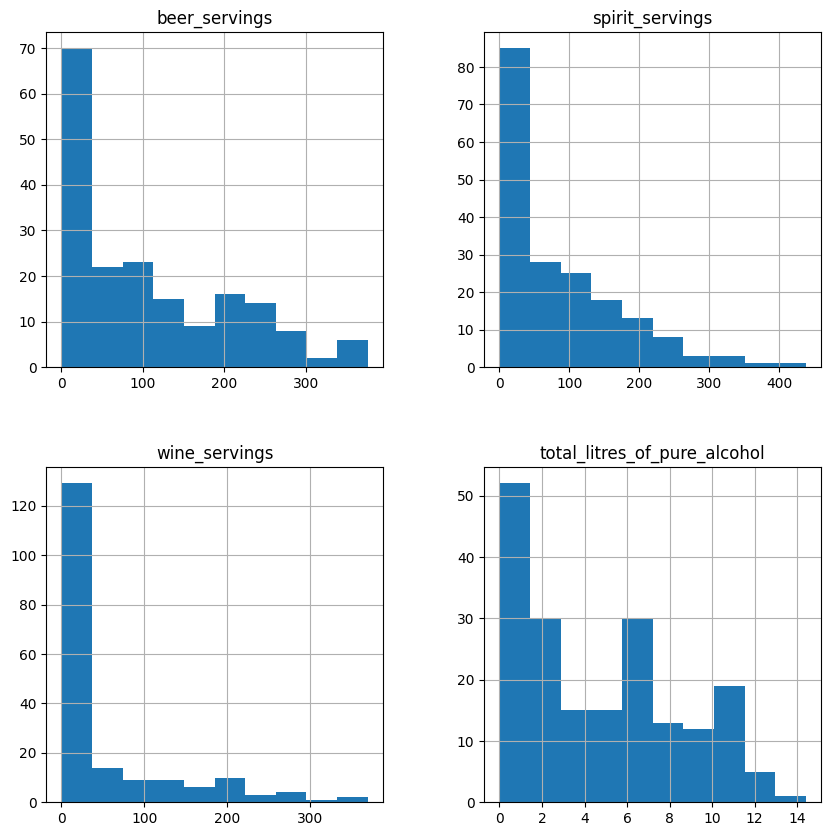

In [79]:
num_cols.hist(figsize=(10,10));

In [80]:
beer_data1 = beer_data.copy()

In [81]:
beer_data1["beer_servings"] = beer_data1["beer_servings"].fillna(beer_data1['beer_servings'].median())
beer_data1

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [82]:
beer_data1["spirit_servings"] = beer_data1["spirit_servings"].fillna(beer_data1['spirit_servings'].median())
beer_data1

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [83]:
beer_data1["wine_servings"] = beer_data1["wine_servings"].fillna(beer_data1['wine_servings'].median())
beer_data1

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [84]:
beer_data1["total_litres_of_pure_alcohol"] = beer_data1["total_litres_of_pure_alcohol"].fillna(beer_data1['total_litres_of_pure_alcohol'].median())
beer_data1

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,76.0,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [85]:
beer_data1.isna().sum()

,0
Unnamed: 0,0
country,0
beer_servings,0
spirit_servings,0
wine_servings,0
total_litres_of_pure_alcohol,0
continent,0


# outliers

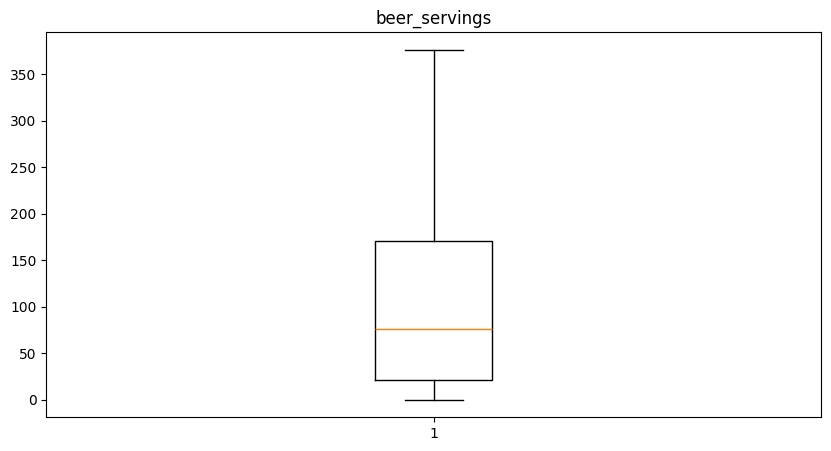

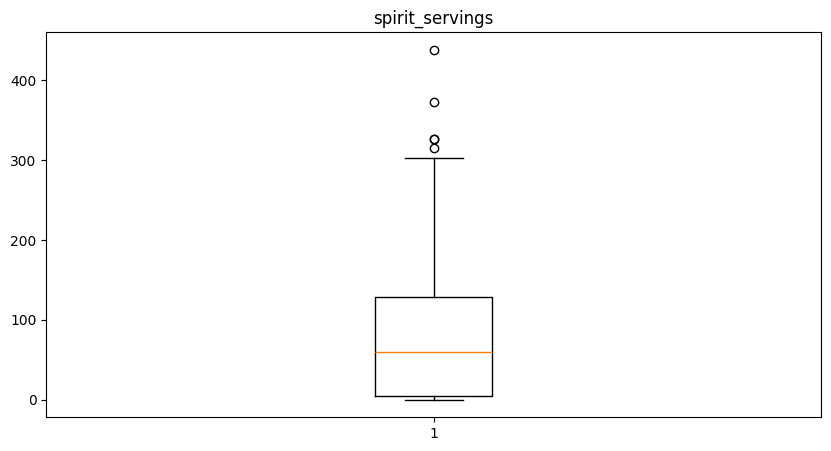

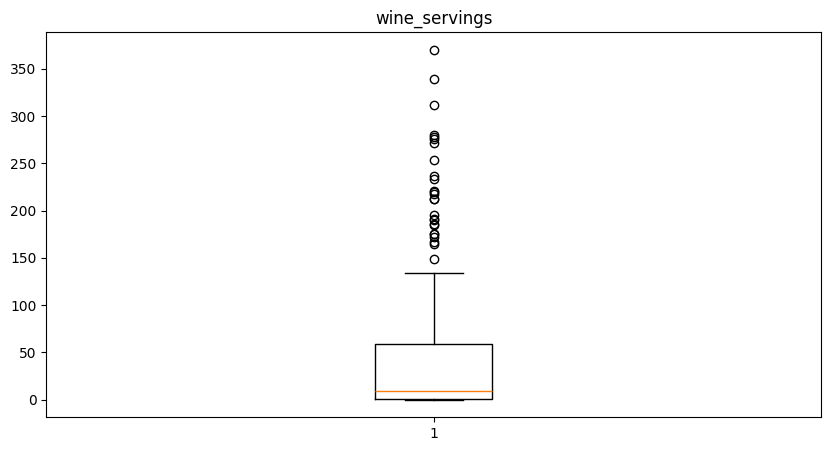

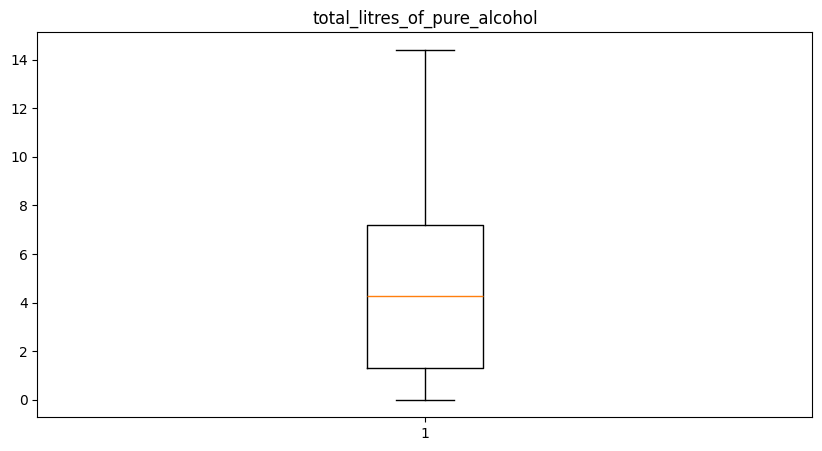

In [86]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(beer_data1[i])
  plt.title(i)

In [87]:
#sprit_servings

q1 = np.quantile(beer_data1['spirit_servings'],0.25)
q3 =np.quantile(beer_data1["spirit_servings"],0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound= q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

312.5
-179.5
123.0


In [88]:
spirit_outliers = []
for  i in beer_data1["spirit_servings"]:
  if i> upper_bound or i< lower_bound:
    spirit_outliers.append(i)

spirit_outliers

[373.0, 438.0, 326.0, 326.0, 315.0]

In [89]:
# winsorize means to compute  values from a range we choose


In [90]:
#clipping

beer_data1["spirit_servings"]= beer_data1["spirit_servings"].clip(lower= lower_bound,upper =upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c3435b02ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c3435b034a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c3435af0da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c3437f29a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c3435b035f0>],
 'means': []}

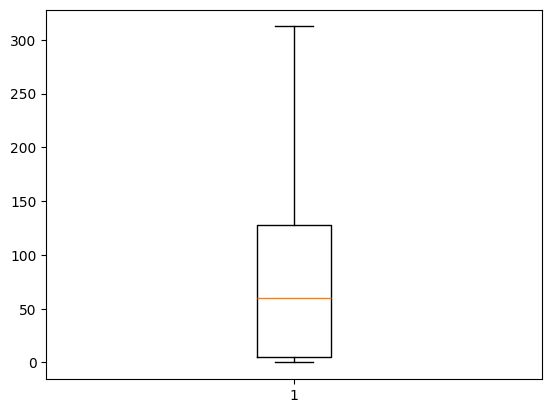

In [91]:
plt.boxplot(beer_data1["spirit_servings"])

In [92]:
# wine_service

q1 = np.quantile(beer_data1['wine_servings'],0.25)
q3 =np.quantile(beer_data1["wine_servings"],0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound= q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

146.0
-86.0
58.0


In [93]:
wine_outliers = []
for  i in beer_data1["wine_servings"]:
  if i> upper_bound or i< lower_bound:
    wine_outliers.append(i)

In [94]:
wine_outliers

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [95]:
beer_data1["wine_servings"]= beer_data1["wine_servings"].clip(lower= lower_bound,upper =upper_bound)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c34356a7710>,
 'caps': [<matplotlib.lines.Line2D at 0x7c34356a7e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c34356a75c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c34356a8500>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c34356a86b0>],
 'means': []}

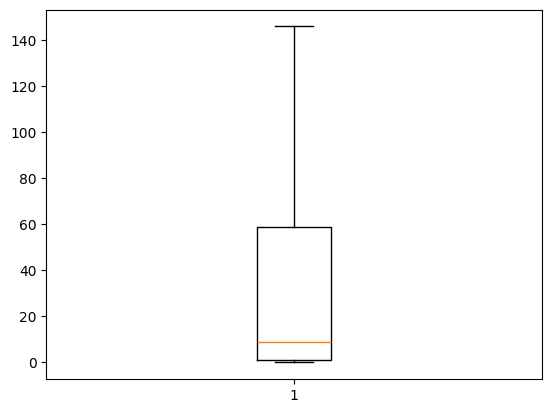

In [96]:
plt.boxplot(beer_data1["wine_servings"])

In [97]:
import seaborn as sns


In [98]:
 data_titanic =sns.load_dataset("titanic")
 data_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [99]:
data_titanic1 =data_titanic.copy()

In [100]:
#pre processing

data_titanic1.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [101]:
data_titanic1.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [102]:
data_titanic1['age']= data_titanic1['age'].fillna(data_titanic1['age'].median())

In [103]:
data_titanic1['embarked']= data_titanic1['embarked'].ffill()
data_titanic1['embark_town']= data_titanic1['embark_town'].ffill()

In [104]:
data_titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [105]:
data_titanic1.dropna(axis=1 , inplace = True)

In [106]:
data_titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [107]:
data_titanic1.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [108]:
data_titanic1.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [109]:
data_titanic1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
886,True
887,False
888,False
889,False


In [110]:
data_titanic1 = data_titanic1.drop(['adult_male', 'alive', 'alone', 'class', 'embarked', 'who'], axis=1, errors='ignore')

In [111]:
data_titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton
887,1,1,female,19.0,0,0,30.0000,Southampton
888,0,3,female,28.0,1,2,23.4500,Southampton
889,1,1,male,26.0,0,0,30.0000,Cherbourg


In [112]:
num_cols1= data_titanic1.select_dtypes(include ='float64')
num_cols1

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,28.0,23.4500
889,26.0,30.0000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

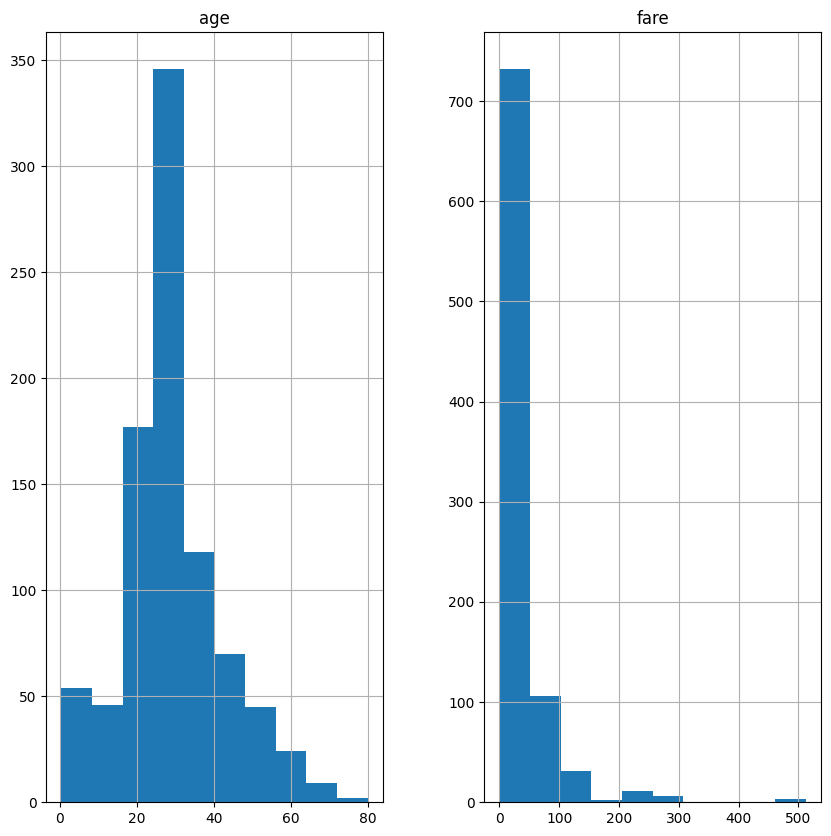

In [113]:
num_cols1.hist(figsize=(10,10))

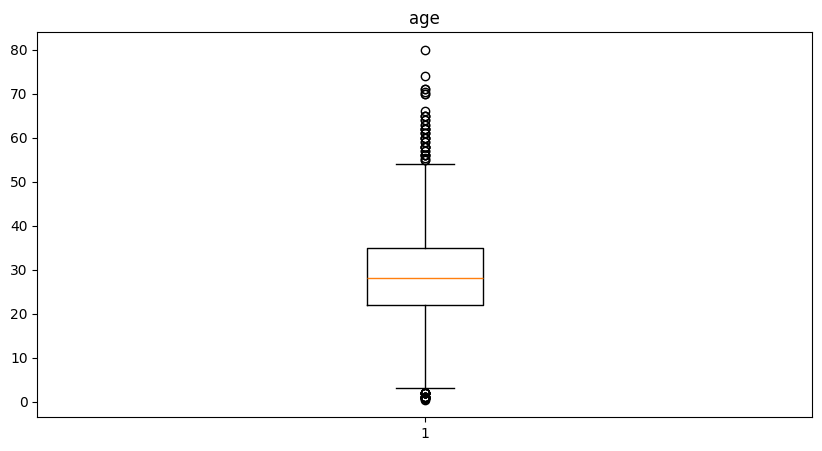

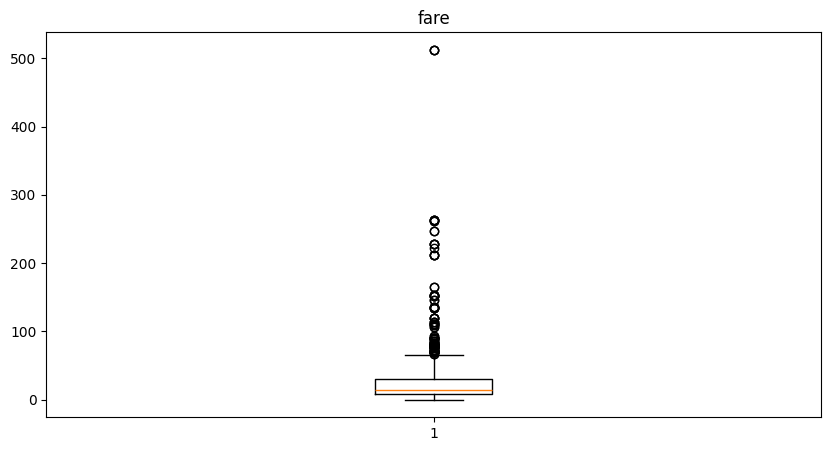

In [114]:
for i in num_cols1:
  plt.figure(figsize=(10,5))
  plt.boxplot(data_titanic1[i])
  plt.title(i)

In [115]:
q1 = np.quantile(data_titanic1['age'],0.25)
q3 =np.quantile(data_titanic1["fare"],0.75)
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound= q1-(1.5*iqr)
print(upper_bound)
print(lower_bound)
print(iqr)

44.5
8.5
9.0


In [116]:
age_outliers = []
for  i in data_titanic1["age"]:
  if i > upper_bound or i < lower_bound:
    age_outliers.append(i)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c342bbed760>,
 'caps': [<matplotlib.lines.Line2D at 0x7c342bbedc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c342bbed550>],
 'medians': [<matplotlib.lines.Line2D at 0x7c342be6cc80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c342bbee330>],
 'means': []}

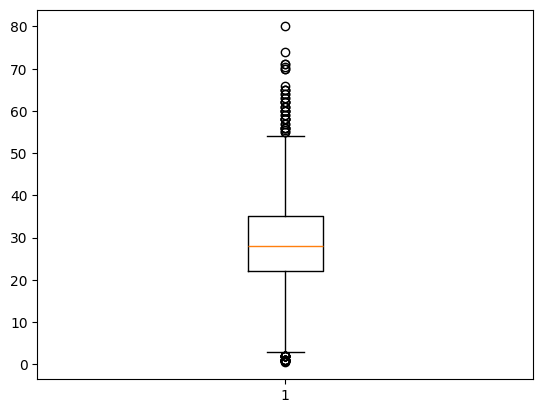

In [117]:
plt.boxplot(data_titanic1["age"])

# Encoding and Decoding

In [120]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [121]:
student = pd.DataFrame({
    "Student_ID":[1,2,3,4,5],
    "Performance_level":["Low","Medium","High","High","Low"],
    "Gender":["Male","Female","Male","Female","Male"],
    'math_score':[75,85,90,78,80],
    'english_score':[82,88,95,79,85],
    'major':['science','arts','science','commerce','arts']
})

In [122]:
student

,Student_ID,Performance_level,Gender,math_score,english_score,major
0,1,Low,Male,75,82,science
1,2,Medium,Female,85,88,arts
2,3,High,Male,90,95,science
3,4,High,Female,78,79,commerce
4,5,Low,Male,80,85,arts


1.  ordinal_enc = OrdinalEncoder(categories=[["Low","Medium","High"]]): This line initializes an OrdinalEncoder object. The categories argument is crucial because it specifies the order of the categories in the "Performance_level" column. In this case, it's explicitly set to "Low", "Medium", and "High". This ensures that the encoding assigns numerical values based on this specific order (e.g., "Low" becomes 0, "Medium" becomes 1, and "High" becomes 2).


2.  student['Performance_level']=ordinal_enc.fit_transform(student[["Performance_level"]]): This line performs the encoding:
student[["Performance_level"]]: This selects the "Performance_level" column from the student DataFrame as a DataFrame (which is required by fit_transform).


3. fit_transform(...): This method fits the encoder to the data (learns the categories and their order) and then transforms the data into numerical representations.


4. student['Performance_level']=...: This assigns the resulting encoded numerical values back to the "Performance_level" column in the student DataFrame, overwriting the original categorical values.

In essence, this code is converting the categorical "Low", "Medium", "High" values in the "Performance_level" column into numerical values (0, 1, 2) while preserving the specified order.

In [123]:
ordinal_enc = OrdinalEncoder(categories=[["Low","Medium","High"]])
student['Performance_level_encoded']=ordinal_enc.fit_transform(student[["Performance_level"]])

In [124]:
student

,Student_ID,Performance_level,Gender,math_score,english_score,major,Performance_level_encoded
0,1,Low,Male,75,82,science,0.0
1,2,Medium,Female,85,88,arts,1.0
2,3,High,Male,90,95,science,2.0
3,4,High,Female,78,79,commerce,2.0
4,5,Low,Male,80,85,arts,0.0


### Label Encoding

Label encoding is another technique for converting categorical data into numerical format. It is often used for **nominal categorical data**, where there is no intrinsic order or ranking among the categories (unlike ordinal data).

In label encoding, each unique category in a column is assigned a unique integer. For example, if you have a "Color" column with categories "Red", "Blue", and "Green", label encoding might assign 0 to "Red", 1 to "Blue", and 2 to "Green". The specific integer assigned to each category is usually based on the order in which the unique categories appear or are processed.

It's important to note that while label encoding is simple to implement, it can introduce an artificial sense of order or hierarchy to the data if used on features where no such order exists. This can sometimes negatively impact the performance of certain machine learning models that might misinterpret these numerical labels as having a meaningful relationship.

In your `student` DataFrame, the "Gender" and "major" columns are good candidates for label encoding as they are nominal categories.

In [125]:
label_enc = LabelEncoder()

student["Gender_encoded"]= label_enc.fit_transform(student["Gender"])

In [126]:
student

,Student_ID,Performance_level,Gender,math_score,english_score,major,Performance_level_encoded,Gender_encoded
0,1,Low,Male,75,82,science,0.0,1
1,2,Medium,Female,85,88,arts,1.0,0
2,3,High,Male,90,95,science,2.0,1
3,4,High,Female,78,79,commerce,2.0,0
4,5,Low,Male,80,85,arts,0.0,1


### One-Hot Encoding with `pd.get_dummies`

One-hot encoding is a process of converting categorical variables into a numerical format that can be easily used by machine learning algorithms. In this method, each unique category is transformed into a new binary column (a "dummy" variable). If the original data point belongs to a specific category, the corresponding dummy variable column will have a value of 1, and 0 otherwise.

This approach is particularly useful for **nominal categorical data** where there is no intrinsic order between categories. Using one-hot encoding prevents machine learning models from misinterpreting numerical labels as having a meaningful order or relationship.

The pandas library provides a convenient function called `get_dummies()` to perform one-hot encoding.

In your `student` DataFrame, the "major" column is a good candidate for one-hot encoding using `get_dummies`.

In [127]:
new_student = pd.get_dummies(student,
                             columns=["major"],
                             prefix="ma",
                            dtype ="int64"  )

In [128]:
new_student

,Student_ID,Performance_level,Gender,math_score,english_score,Performance_level_encoded,Gender_encoded,ma_arts,ma_commerce,ma_science
0,1,Low,Male,75,82,0.0,1,0,0,1
1,2,Medium,Female,85,88,1.0,0,1,0,0
2,3,High,Male,90,95,2.0,1,0,0,1
3,4,High,Female,78,79,2.0,0,0,1,0
4,5,Low,Male,80,85,0.0,1,1,0,0


In [129]:
new_student = pd.get_dummies(student,
                             columns=["major"],
                             prefix="ma",
                             drop_first =True,
                            dtype ="int64"  )

In [130]:
new_student

,Student_ID,Performance_level,Gender,math_score,english_score,Performance_level_encoded,Gender_encoded,ma_commerce,ma_science
0,1,Low,Male,75,82,0.0,1,0,1
1,2,Medium,Female,85,88,1.0,0,0,0
2,3,High,Male,90,95,2.0,1,0,1
3,4,High,Female,78,79,2.0,0,1,0
4,5,Low,Male,80,85,0.0,1,0,0


TWo types of Encoding Methods

Frequency Encoding

Target Encoding

### Frequency Encoding

Frequency encoding is a technique where each category in a categorical feature is replaced with the frequency (or count) or the percentage of that category in the dataset. This method can be useful for handling high-cardinality categorical features where one-hot encoding would create too many new columns.

The idea is that categories that appear more frequently might have a different impact on the target variable than categories that appear less frequently.

Here's how you can apply frequency encoding to the 'major' column in your `student` DataFrame:

### Target Encoding

Target encoding (also known as Mean Encoding or Likelihood Encoding) is a technique where each category in a categorical feature is replaced by the mean of the target variable for that category. This method is particularly useful when there is a strong relationship between the categorical feature and the target variable.

It's important to be cautious with target encoding to avoid data leakage, especially in the context of machine learning models. Cross-validation or splitting the data into training and validation sets is often used to mitigate this risk.

For demonstration purposes, let's assume we have a hypothetical binary target variable 'Pass' (0 or 1) in our `student` DataFrame and apply target encoding to the 'major' column.

**Note:** Since your `student` DataFrame doesn't have a target variable, this example is illustrative. In a real scenario, you would replace the hypothetical 'Pass' column with your actual target variable.

In [131]:
data_titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embark_town
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton
887,1,1,female,19.0,0,0,30.0000,Southampton
888,0,3,female,28.0,1,2,23.4500,Southampton
889,1,1,male,26.0,0,0,30.0000,Cherbourg


In [137]:
label_enc = LabelEncoder()

data_titanic1["Gender_encoded"]= label_enc.fit_transform(data_titanic1["sex"])



In [134]:
data_titanic1

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,Gender_encoded
0,0,3,male,22.0,1,0,7.2500,Southampton,1
1,1,1,female,38.0,1,0,71.2833,Cherbourg,0
2,1,3,female,26.0,0,0,7.9250,Southampton,0
3,1,1,female,35.0,1,0,53.1000,Southampton,0
4,0,3,male,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Southampton,1
887,1,1,female,19.0,0,0,30.0000,Southampton,0
888,0,3,female,28.0,1,2,23.4500,Southampton,0
889,1,1,male,26.0,0,0,30.0000,Cherbourg,1


In [143]:
data_titanic1 = data_titanic1.drop("sex",axis =1)

In [144]:
data_titanic1

,survived,pclass,age,sibsp,parch,fare,embark_town,Gender_encoded
0,0,3,22.0,1,0,7.2500,Southampton,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0
2,1,3,26.0,0,0,7.9250,Southampton,0
3,1,1,35.0,1,0,53.1000,Southampton,0
4,0,3,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Southampton,1
887,1,1,19.0,0,0,30.0000,Southampton,0
888,0,3,28.0,1,2,23.4500,Southampton,0
889,1,1,26.0,0,0,30.0000,Cherbourg,1


In [145]:
new_data_titanic1 = pd.get_dummies(data_titanic1,
                             columns=["embark_town"],
                             prefix="eb",
                            dtype ="int64"  )

In [146]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Cherbourg,eb_Queenstown,eb_Southampton
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,0,1
889,1,1,26.0,0,0,30.0000,1,1,0,0


In [147]:
new_data_titanic1 = pd.get_dummies(data_titanic1,
                             columns=["embark_town"],
                             prefix="eb",
                             drop_first = True,
                            dtype ="int64"  )

In [148]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,28.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


## Feature Scaling

Feature scaling is a data preprocessing technique used to standardize or normalize the range of independent variables or features of a dataset. It is a crucial step in data preprocessing for many machine learning algorithms, especially those that are sensitive to the scale of the input features, such as:

- **Gradient Descent based algorithms:** (e.g., Linear Regression, Logistic Regression, Neural Networks) - Feature scaling ensures that the gradient descent converges faster.
- **Distance-based algorithms:** (e.g., K-Nearest Neighbors, Support Vector Machines, K-Means Clustering) - These algorithms calculate distances between data points, and features with larger scales can disproportionately influence the distance calculation.
- **Principal Component Analysis (PCA):** PCA aims to find the directions of maximum variance, and features with larger scales will have a larger variance and dominate the principal components if not scaled.

There are two common methods for feature scaling:

1. **Standardization (Z-score normalization):** This method scales the features such that they have a mean of 0 and a standard deviation of 1. The formula for standardization is:

   $x_{scaled} = (x - \mu) / \sigma$

   where $\mu$ is the mean and $\sigma$ is the standard deviation of the feature.

2. **Normalization (Min-Max scaling):** This method scales the features to a fixed range, usually between 0 and 1. The formula for normalization is:

   $x_{scaled} = (x - x_{min}) / (x_{max} - x_{min})$

   where $x_{min}$ is the minimum value and $x_{max}$ is the maximum value of the feature.

The choice between standardization and normalization depends on the specific dataset and the machine learning algorithm being used.

In your notebook, the `age` and `fare` columns in the `data_titanic1` DataFrame could potentially benefit from feature scaling before being used in a machine learning model, as they have different ranges.

In [149]:
new_student

,Student_ID,Performance_level,Gender,math_score,english_score,Performance_level_encoded,Gender_encoded,ma_commerce,ma_science
0,1,Low,Male,75,82,0.0,1,0,1
1,2,Medium,Female,85,88,1.0,0,0,0
2,3,High,Male,90,95,2.0,1,0,1
3,4,High,Female,78,79,2.0,0,1,0
4,5,Low,Male,80,85,0.0,1,0,0


In [164]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [166]:
std_sclar =StandardScaler()
mini_sclar = MinMaxScaler()

In [167]:
student ["Math_Score_std"]=std_sclar.fit_transform(student[["math_score"]])

In [168]:
student

,Student_ID,Performance_level,Gender,math_score,english_score,major,Performance_level_encoded,Gender_encoded,Math_Score_std,english_score_min
0,1,Low,Male,75,82,science,0.0,1,-1.241971,0.1875
1,2,Medium,Female,85,88,arts,1.0,0,0.639803,0.5625
2,3,High,Male,90,95,science,2.0,1,1.580691,1.0000
3,4,High,Female,78,79,commerce,2.0,0,-0.677439,0.0000
4,5,Low,Male,80,85,arts,0.0,1,-0.301084,0.3750


In [169]:
student["english_score_min"]= mini_sclar.fit_transform(student[["english_score"]])

In [170]:
student

,Student_ID,Performance_level,Gender,math_score,english_score,major,Performance_level_encoded,Gender_encoded,Math_Score_std,english_score_min
0,1,Low,Male,75,82,science,0.0,1,-1.241971,0.1875
1,2,Medium,Female,85,88,arts,1.0,0,0.639803,0.5625
2,3,High,Male,90,95,science,2.0,1,1.580691,1.0000
3,4,High,Female,78,79,commerce,2.0,0,-0.677439,0.0000
4,5,Low,Male,80,85,arts,0.0,1,-0.301084,0.3750


In [171]:
student.describe()

,Student_ID,math_score,english_score,Performance_level_encoded,Gender_encoded,Math_Score_std,english_score_min
count,5.000000,5.00000,5.000000,5.0,5.000000,5.000000e+00,5.000000
mean,3.000000,81.60000,85.800000,1.0,0.600000,1.043610e-15,0.425000
std,1.581139,5.94138,6.140033,1.0,0.547723,1.118034e+00,0.383752
min,1.000000,75.00000,79.000000,0.0,0.000000,-1.241971e+00,0.000000
25%,2.000000,78.00000,82.000000,0.0,0.000000,-6.774389e-01,0.187500
50%,3.000000,80.00000,85.000000,1.0,1.000000,-3.010840e-01,0.375000
75%,4.000000,85.00000,88.000000,2.0,1.000000,6.398034e-01,0.562500
max,5.000000,90.00000,95.000000,2.0,1.000000,1.580691e+00,1.000000


Apply in titanic

In [172]:
data_titanic1

,survived,pclass,age,sibsp,parch,fare,embark_town,Gender_encoded
0,0,3,22.0,1,0,7.2500,Southampton,1
1,1,1,38.0,1,0,71.2833,Cherbourg,0
2,1,3,26.0,0,0,7.9250,Southampton,0
3,1,1,35.0,1,0,53.1000,Southampton,0
4,0,3,35.0,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,Southampton,1
887,1,1,19.0,0,0,30.0000,Southampton,0
888,0,3,28.0,1,2,23.4500,Southampton,0
889,1,1,26.0,0,0,30.0000,Cherbourg,1


In [185]:

new_data_titanic1[["age_scaled", "fare_scaled"]] = mini_sclar.fit_transform(new_data_titanic1[["age", "fare"]])

In [186]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
0,0,3,22.0,1,0,7.2500,1,0,1,0.271174,0.014151
1,1,1,38.0,1,0,71.2833,0,0,0,0.472229,0.139136
2,1,3,26.0,0,0,7.9250,0,0,1,0.321438,0.015469
3,1,1,35.0,1,0,53.1000,0,0,1,0.434531,0.103644
4,0,3,35.0,0,0,8.0500,1,0,1,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0.334004,0.025374
887,1,1,19.0,0,0,30.0000,0,0,1,0.233476,0.058556
888,0,3,28.0,1,2,23.4500,0,0,1,0.346569,0.045771
889,1,1,26.0,0,0,30.0000,1,0,0,0.321438,0.058556


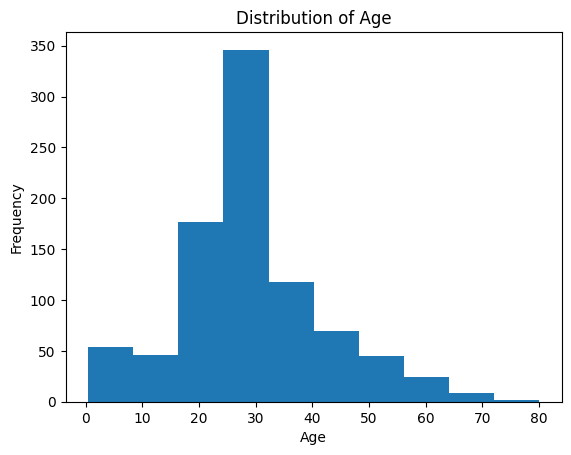

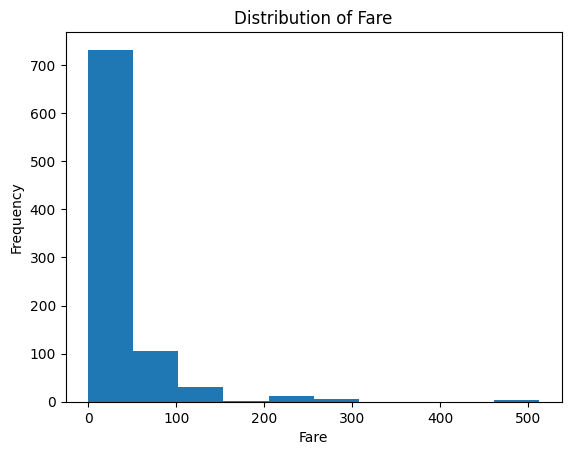

In [184]:
plt.hist(new_data_titanic1['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.hist(new_data_titanic1['fare'])
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [179]:
from scipy.stats import skew

In [228]:
skewness = skew(new_data_titanic1["age"])
skewness

np.float64(0.5093852558219663)

In [229]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
0,0,3,22.0,1,0,7.2500,1,0,1,0.271174,0.014151
1,1,1,38.0,1,0,71.2833,0,0,0,0.472229,0.139136
2,1,3,26.0,0,0,7.9250,0,0,1,0.321438,0.015469
3,1,1,35.0,1,0,53.1000,0,0,1,0.434531,0.103644
4,0,3,35.0,0,0,8.0500,1,0,1,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0.334004,0.025374
887,1,1,19.0,0,0,30.0000,0,0,1,0.233476,0.058556
888,0,3,28.0,1,2,23.4500,0,0,1,0.346569,0.045771
889,1,1,26.0,0,0,30.0000,1,0,0,0.321438,0.058556


correlation

In [230]:
corr_new_titanic_data1 = new_data_titanic1.corr()
corr_new_titanic_data1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.543351,0.008660,-0.155660,-0.064910,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.131900,0.213504,0.081720,-0.339898,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.021272,-0.014665,1.000000,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.114631,-0.028085,0.070941,-0.233296,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.245489,-0.082636,0.063036,-0.172482,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182333,-0.112712,-0.166603,0.096688,1.000000
Gender_encoded,-0.543351,0.131900,0.081163,-0.114631,-0.245489,-0.182333,1.000000,-0.079067,0.125722,0.081163,-0.182333
eb_Queenstown,0.008660,0.213504,-0.021272,-0.028085,-0.082636,-0.112712,-0.079067,1.000000,-0.500146,-0.021272,-0.112712
eb_Southampton,-0.155660,0.081720,-0.014665,0.070941,0.063036,-0.166603,0.125722,-0.500146,1.000000,-0.014665,-0.166603
age_scaled,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.081163,-0.021272,-0.014665,1.000000,0.096688


# OTHER SCALING TECHNIQUES


Robust sclaer

QuantileScaler

maxabsscalar

normalizer

power Transfomer

# OTHER SCALING TECHNIQUES

Beyond Standardization and Normalization, there are other scaling techniques that can be useful depending on the distribution of your data and the requirements of your machine learning model:

- **RobustScaler:** This scaler removes the median and scales the data according to the quantile range (the IQR, which is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile)). It is robust to outliers.

- **QuantileTransformer:** This transformer scales features using quantile information. It transforms features to follow a uniform or normal distribution. This can be useful for handling skewed data.

- **MaxAbsScaler:** This scaler scales each feature by its maximum absolute value. It is useful for data that is already centered at zero or sparse data.

- **Normalizer:** This scaler scales individual samples to have unit norm. This is often used for text classification or clustering.

- **PowerTransformer:** This transformer applies a power transform to make data more Gaussian-like. It can be used to stabilize variance and minimize skewness. Common power transforms include the Box-Cox transform and the Yeo-Johnson transform.

The choice of scaling technique depends on the characteristics of your data and the specific algorithm you plan to use. It's often a good practice to experiment with different scaling methods and evaluate their impact on your model's performance.

### When to Use Each Scaling Technique:

Here's a breakdown of when to consider using each of the scaling techniques:

**1. StandardScaler (Standardization - Z-score normalization):**

*   **When to use:**
    *   When your data follows a **Gaussian (normal) distribution**.
    *   For algorithms that assume your data is centered around zero and has unit variance (e.g., Linear Regression, Logistic Regression, Linear SVM, PCA, K-Means).
    *   When you want to preserve information about outliers, as standardization scales data relative to the mean and standard deviation, which are influenced by outliers.

*   **How it works:** Scales features to have a mean of 0 and a standard deviation of 1.

**2. MinMaxScaler (Normalization - Min-Max scaling):**

*   **When to use:**
    *   When your data does **not follow a normal distribution**.
    *   When you need to scale data to a **specific fixed range**, typically [0, 1] or [-1, 1].
    *   For algorithms that are sensitive to the magnitude of the features (e.g., K-Nearest Neighbors, Neural Networks, Support Vector Machines with RBF kernel).
    *   When you want to reduce the impact of outliers, as normalization scales data based on the minimum and maximum values, which can compress the range of values in the presence of outliers.

*   **How it works:** Scales features to a given range (e.g., [0, 1]) based on the minimum and maximum values.

**3. RobustScaler:**

*   **When to use:**
    *   When your data contains **many outliers**.
    *   When you want a scaling technique that is **less affected by outliers** compared to Standardization or Normalization.
    *   For algorithms that are sensitive to outliers.

*   **How it works:** Scales features using the median and the Interquartile Range (IQR), which are robust to outliers.

**4. QuantileTransformer:**

*   **When to use:**
    *   When you want to transform your data to follow a **uniform or normal distribution**.
    *   When dealing with data that is **highly skewed** or has **non-linear relationships** between features.
    *   For algorithms that perform better with normally distributed data (e.g., Linear Regression, PCA).

*   **How it works:** Maps data to a desired distribution (uniform or normal) based on quantile information.

**5. MaxAbsScaler:**

*   **When to use:**
    *   When your data is **already centered at zero** or contains **sparse data** (many zeros).
    *   When you want to scale each feature by its maximum absolute value.

*   **How it works:** Scales each feature by dividing by its maximum absolute value, resulting in values between -1 and 1.

**6. Normalizer:**

*   **When to use:**
    *   When you want to scale **each sample** (row) to have unit norm, regardless of the distribution of the features.
    *   Commonly used in text classification or clustering with techniques like TF-IDF.

*   **How it works:** Scales each sample independently by dividing by its L1 or L2 norm.

**7. PowerTransformer:**

*   **When to use:**
    *   When you want to make your data **more Gaussian-like** to satisfy the assumptions of certain models.
    *   When you want to **stabilize variance** and **minimize skewness**.

*   **How it works:** Applies a power transformation (like Box-Cox or Yeo-Johnson) to the data to make it more normally distributed.

**Key Considerations:**

*   **Distribution of your data:** Understand the distribution of your features (e.g., normal, skewed, presence of outliers).
*   **Machine learning algorithm:** Different algorithms have different assumptions and sensitivities to feature scaling.
*   **Experimentation:** It's often best to experiment with different scaling techniques and evaluate their impact on your model's performance using metrics and cross-validation.

I hope this helps clarify when to use each of these scaling techniques!

In [231]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
0,0,3,22.0,1,0,7.2500,1,0,1,0.271174,0.014151
1,1,1,38.0,1,0,71.2833,0,0,0,0.472229,0.139136
2,1,3,26.0,0,0,7.9250,0,0,1,0.321438,0.015469
3,1,1,35.0,1,0,53.1000,0,0,1,0.434531,0.103644
4,0,3,35.0,0,0,8.0500,1,0,1,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0.334004,0.025374
887,1,1,19.0,0,0,30.0000,0,0,1,0.233476,0.058556
888,0,3,28.0,1,2,23.4500,0,0,1,0.346569,0.045771
889,1,1,26.0,0,0,30.0000,1,0,0,0.321438,0.058556


# First split

seperate the target and the features

# Horizontal Split

 horizontal split is commonly used to separate your features (the independent variables) from your target variable (the dependent variable you want to predict). training and testing the data



In [232]:
from sklearn.model_selection import train_test_split

In [233]:
 #first split

 y = new_data_titanic1["survived"]
 x = new_data_titanic1.drop(columns=['survived'])

In [234]:
y.shape

(891,)

In [235]:
x.shape

(891, 10)

In [240]:
#second split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2,random_state=42)

# here random_state is used as name of method used by the sysytem because once again it run for several time it will reduce the errors in the computer

In [241]:
x_train .shape

(712, 10)

In [242]:
x_test.shape

(179, 10)

In [243]:
y_train.shape

(712,)

In [244]:
y_test.shape

(179,)

In [245]:
x_train.head()

,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
331,1,45.5,0,0,28.5000,1,0,1,0.566474,0.055628
733,2,23.0,0,0,13.0000,1,0,1,0.283740,0.025374
382,3,32.0,0,0,7.9250,1,0,1,0.396833,0.015469
704,3,26.0,1,0,7.8542,1,0,1,0.321438,0.015330
813,3,6.0,4,2,31.2750,0,0,1,0.070118,0.061045


In [246]:
new_data_titanic1

,survived,pclass,age,sibsp,parch,fare,Gender_encoded,eb_Queenstown,eb_Southampton,age_scaled,fare_scaled
0,0,3,22.0,1,0,7.2500,1,0,1,0.271174,0.014151
1,1,1,38.0,1,0,71.2833,0,0,0,0.472229,0.139136
2,1,3,26.0,0,0,7.9250,0,0,1,0.321438,0.015469
3,1,1,35.0,1,0,53.1000,0,0,1,0.434531,0.103644
4,0,3,35.0,0,0,8.0500,1,0,1,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1,0.334004,0.025374
887,1,1,19.0,0,0,30.0000,0,0,1,0.233476,0.058556
888,0,3,28.0,1,2,23.4500,0,0,1,0.346569,0.045771
889,1,1,26.0,0,0,30.0000,1,0,0,0.321438,0.058556
